In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

###According to   Oregon State University, fisheries biologists use three different measurments to measure fich lenght: 1. Total Length, 2. Fork Length, and 3. Standard Length.  

The following image is sourced from Oregon State University's website at this link: 

https://www.fsl.orst.edu/geowater/FX3/help/9_Fish_Performance/Measures_of_Fish_Length.htm#:~:text=Fisheries%20biologists%20use%20three%20different%20measures%20of%20length%3A,lengths%20entered%20into%20FishXing%20should%20be%20total%20lengths.  


Oregon State University. (n.d.). Measures of fish length. Retrieved from Oregon State University.


'photo sourced from: Oregon State University. (n.d.). Measures of fish length. Retrieved from Oregon State University.'

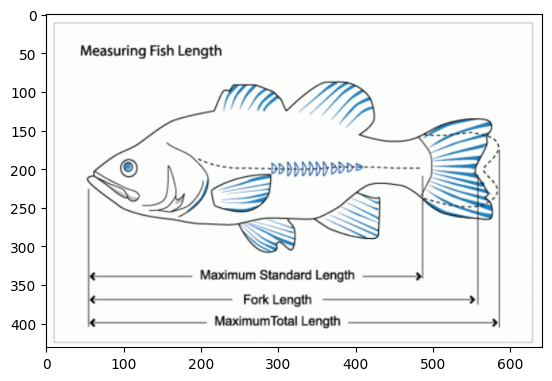

In [165]:
img=plt.imread('MeasuringFish.png')
display("photo sourced from: Oregon State University. (n.d.). Measures of fish length. Retrieved from Oregon State University.")
plt.imshow(img)

# ElasticNet

In [148]:
fish_market=pd.read_csv('FishData.csv')

In [149]:
df=fish_market
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [150]:
df.describe(include='object')

,Species
count,159
unique,7
top,Perch
freq,56


In [151]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

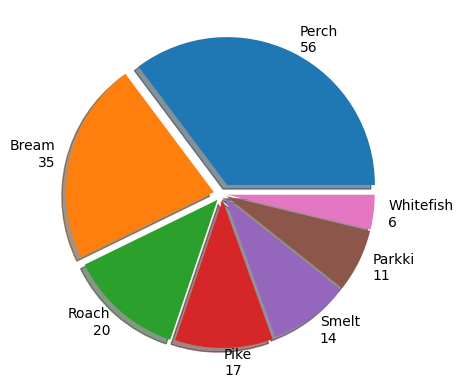

In [152]:
pie=df['Species'].value_counts()
labels=[f'{fish}\n{count}' for fish,count in zip(pie.index,pie.values)]
plt.pie(pie.values,labels=labels,explode=[.07,.06,.05,.04,.03,.03,.03,],shadow=True)
plt.show()

In [153]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [154]:
df.loc[df['Weight']<=0,'Weight']=120
df.loc[df['Species']=='Roach'].sort_values(by='Weight').head(1)


,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.268


In [155]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

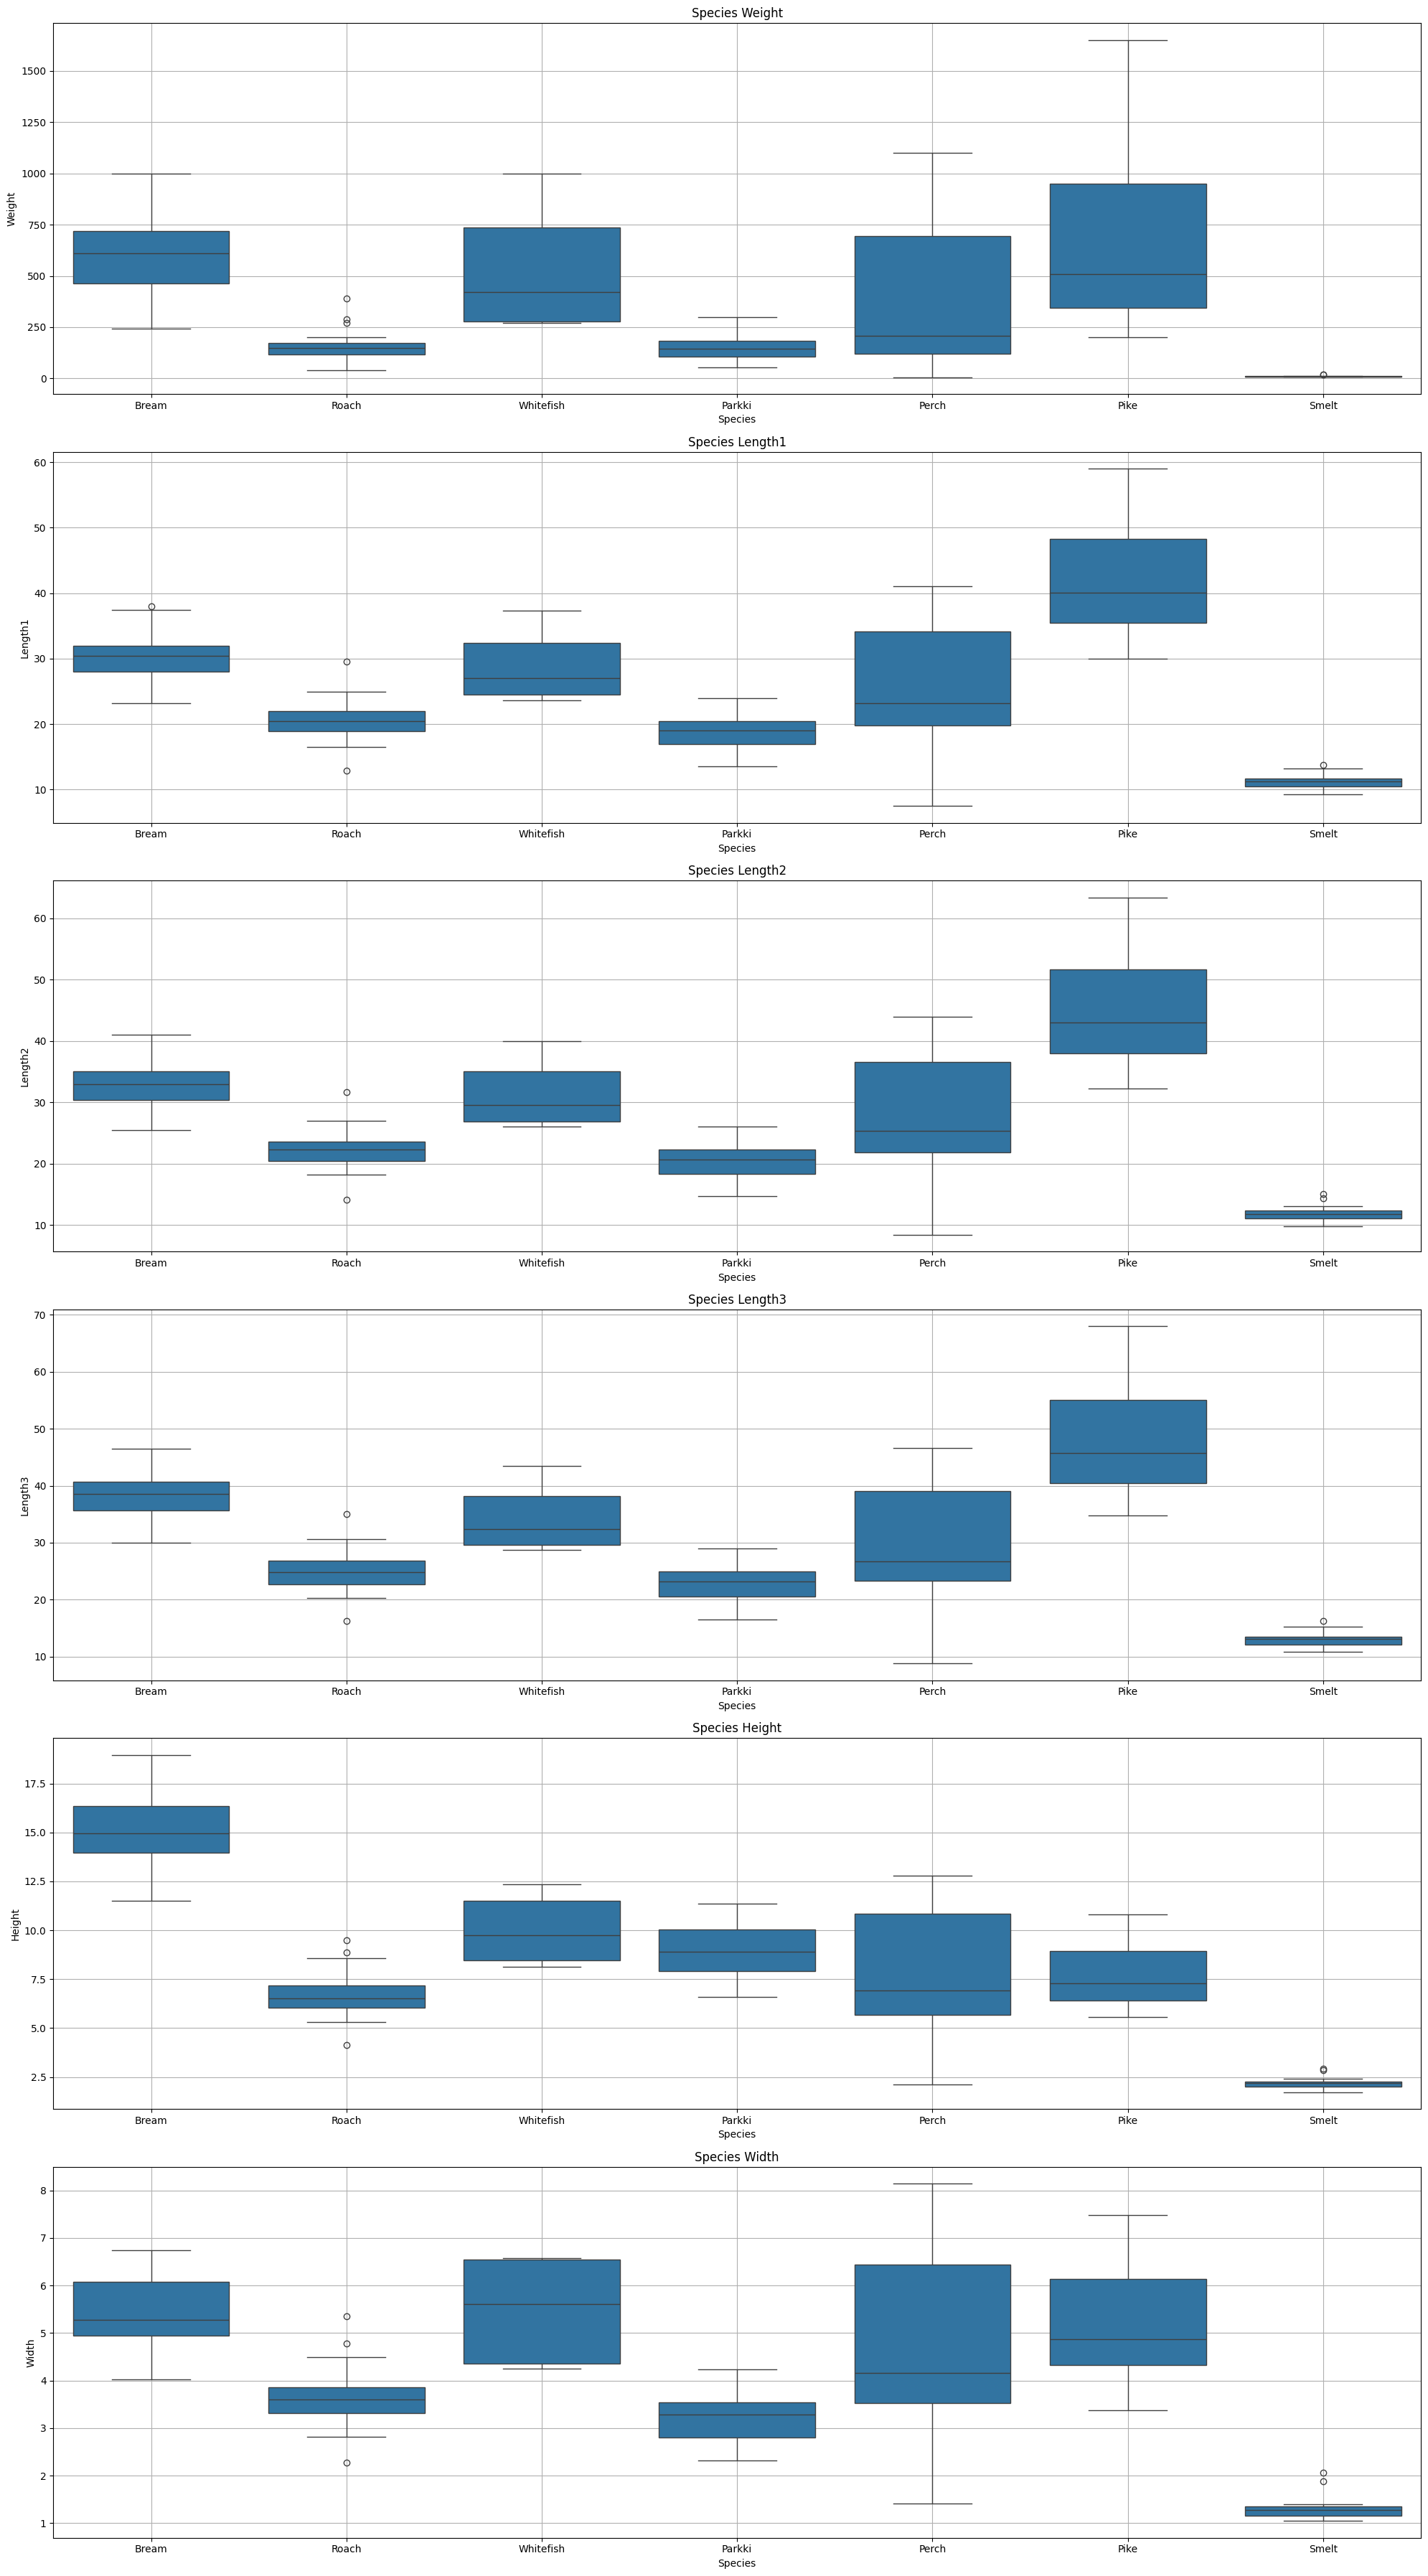

In [156]:
columns=[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']
n=len(columns)
col=1
rows=n//col if n//col%col==0 else (n//col)+1
x='Species'
plt.figure(figsize=(col*20,rows*6))
for i in range(1,n+1):
    ax=i
    column=columns[i-1]
    plt.subplot(rows,col,ax)
    sns.boxplot(data=df,x=x,y=column,)
    plt.xlabel(x)
    plt.ylabel(column)
    plt.title(x+' '+column)
    plt.grid()
plt.tight_layout()

plt.show()

according to my browser AI, Roach ficsh can weigh 12* the average. That's a big spread, and our data reflects that.  
However, the source site, https://en.wikipedia.org/wiki/Common_roach, is down.  

according to https://www.mdb.fish/fish-fact-sheets/australian-smelt, smelt can be twice as long as the normal length. So, again, the research backs up the spread in the data.


In [163]:
grp=df.groupby('Species',as_index=False)['Weight'].mean().rename(columns={'Weight':'Mean_Weight'})
grp.sort_values(by='Mean_Weight',inplace=True)
grp['Species_Ordinal']=np.round(grp['Mean_Weight'])
lookup=dict(zip(grp['Species'],grp['Species_Ordinal']))
numeric_lookup=list(zip(grp['Species'],grp['Species_Ordinal']))  # this can be stored as a pickle if jason isn't preferred 
df['Ordinal_Species']=df['Species'].apply(lambda x: lookup.get(x,np.nan))
df



,Species,Weight,Length1,Length2,Length3,Height,Width,Ordinal_Species,Weight_log,Length1_log,Length2_log,Length3_log,Height_log
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,618.0,5.488938,3.144152,3.234749,3.401197,2.444085
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,618.0,5.669881,3.178054,3.269569,3.440418,2.524127
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,618.0,5.828946,3.173878,3.277145,3.437208,2.515905
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,618.0,5.894403,3.269569,3.367296,3.511545,2.543961
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,618.0,6.063785,3.277145,3.367296,3.526361,2.521239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,11.0,2.501436,2.442347,2.501436,2.595255,0.737355
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,11.0,2.595255,2.459589,2.517696,2.602690,0.887891
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,11.0,2.501436,2.493205,2.564949,2.624669,0.822859
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,11.0,2.980619,2.580217,2.660260,2.721295,1.055287


a look at distributions

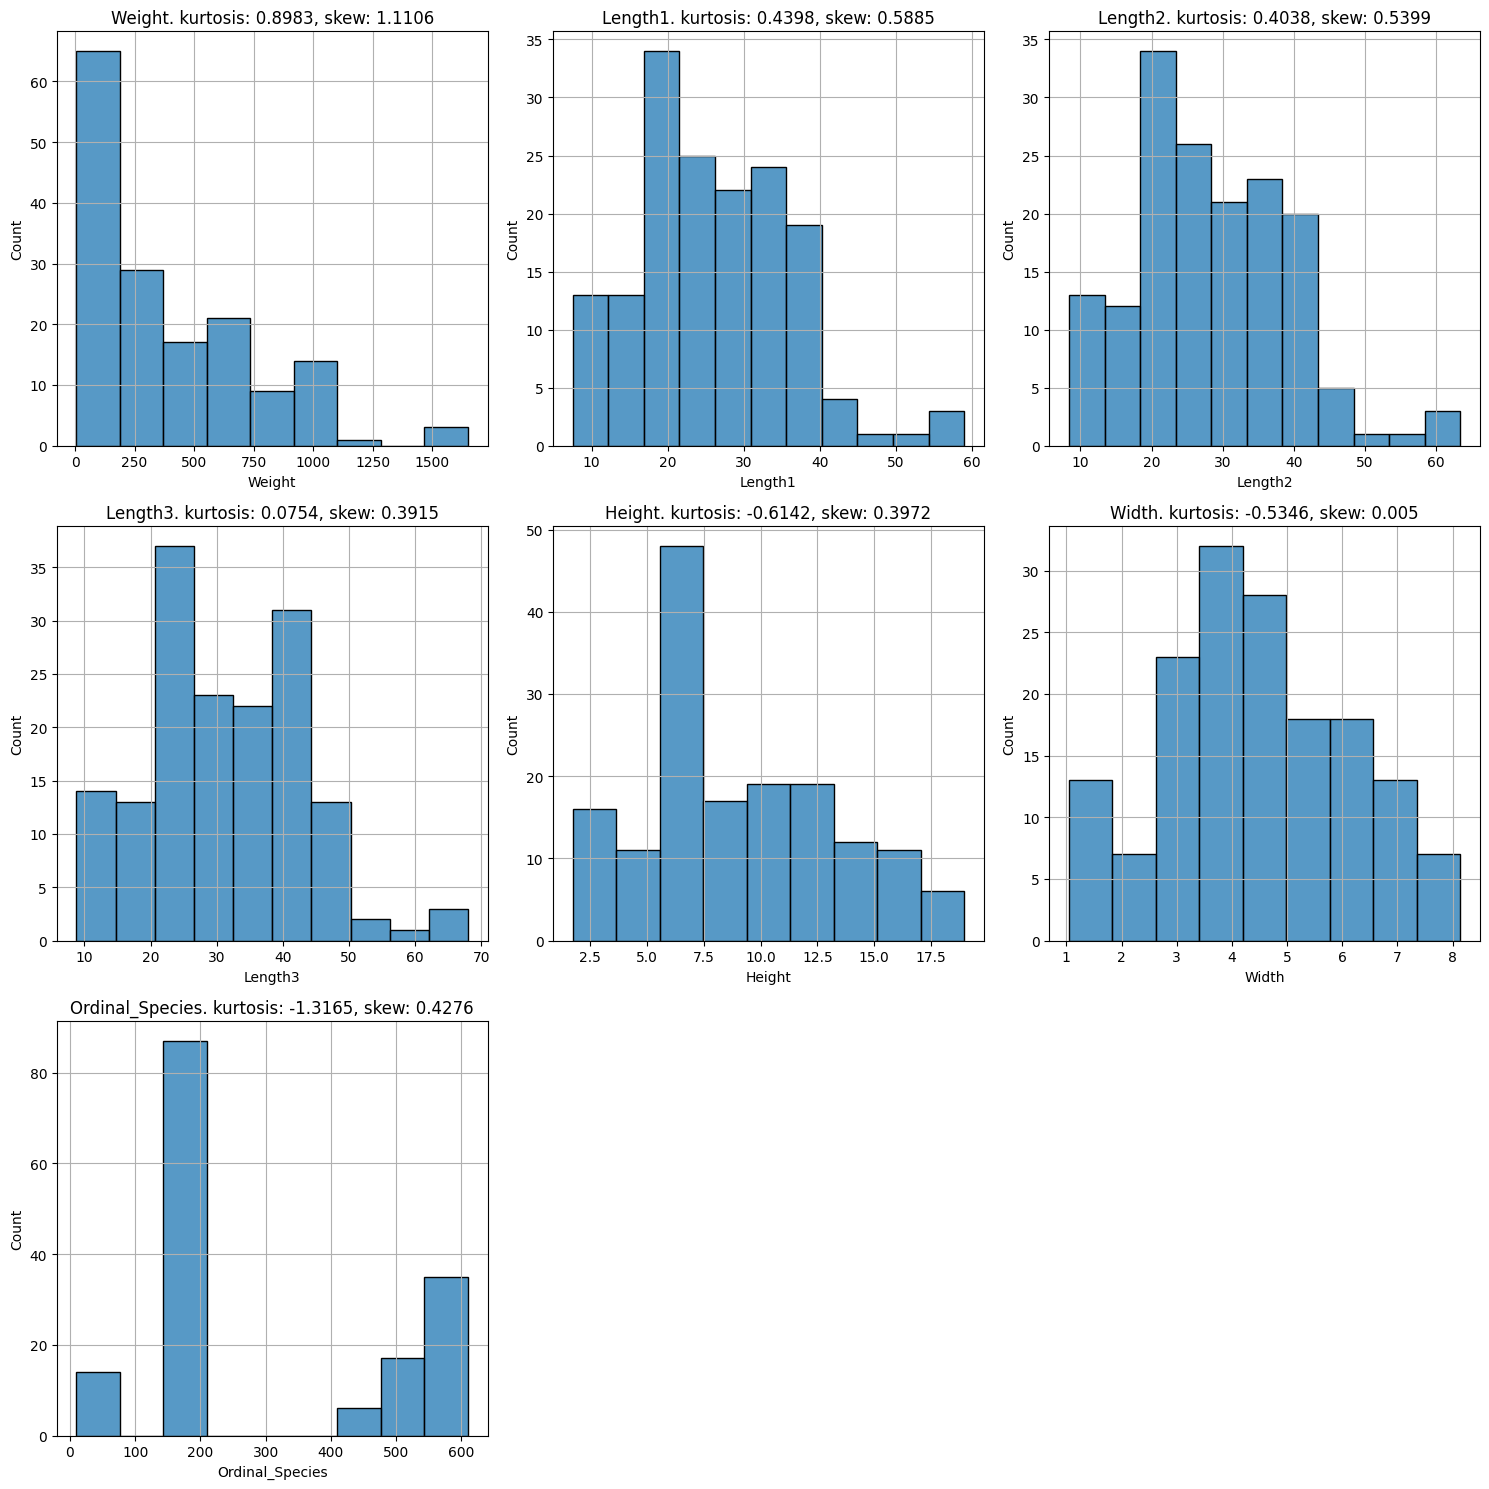

In [158]:
columns=[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height','Width','Ordinal_Species']
col=3
n=len(columns)
rows=n//col if n//col%col==0 else (n//col)+1
plt.figure(figsize=(col*5,rows*5))
for i in range(1,n+1):
    ax=i
    column=columns[i-1]
    x=df[column]
    plt.subplot(rows,col,ax)
    sns.histplot(x)
    kurt=round(x.kurt(),4)
    skew=round(x.skew(),4)
    plt.title(f'{column}. kurtosis: {kurt}, skew: {skew}')
    plt.grid()
plt.tight_layout()
plt.show() 


In [159]:
cols=[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height',]
for col in cols:
    df[f'{col}_log']=np.log(df[col])



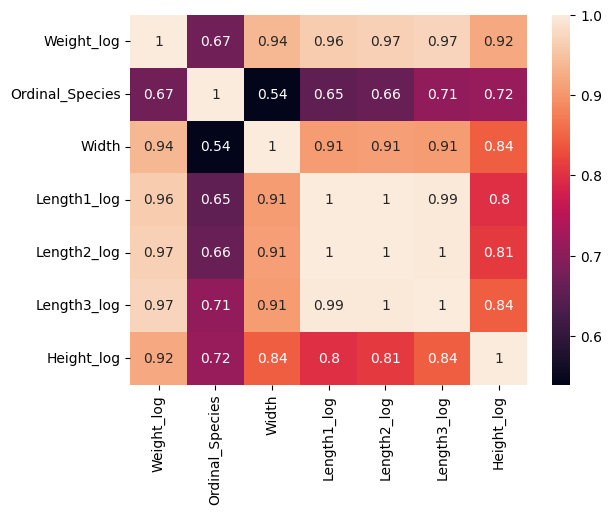

In [160]:
columns=['Weight_log','Ordinal_Species', 'Width',  'Length1_log', 'Length2_log', 'Length3_log', 'Height_log']
x=df[columns].corr()
sns.heatmap(x,annot=True)
plt.show()

# create a model

In [161]:
from sklearn.model_selection import train_test_split

X=df[['Ordinal_Species', 'Width',  'Length1_log', 'Length2_log', 'Length3_log', 'Height_log']]
y=df['Weight_log']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=43)


# fine tune hyper parameters

In [162]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

model1=ElasticNet(alpha=.1)
cv_s=cross_val_score(model1,x_train,y_train,cv=5,scoring='r2')
mean=cv_s.mean()
scores=cv_s
print(f'mean r2={mean}, cv\'s: {scores}')


mean r2=0.9268334164312358, cv's: [0.8776528  0.93478818 0.9345833  0.95036361 0.93677919]


The model predicts Weight with a 0.93 R2